# Project 2- Jon Reynolds
Ames Housing Data

### Contents:
- [Problem Statement](#Problem-Statement)
- [Executive Summary](#Executive-Summary)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Preliminary EDA](#Preliminary-EDA)
- [Feature Engineering](#Feature-Engineering)
- [Model Prep](#Model-Prep)
- [Linear Regression](#Linear-Regression)
- [Scaling our Data](#Scaling-our-Data)
- [Lasso regularization method](#Lasso-regularization-method)
- [Ridge regularization method](#Ridge-regularization-method)
- [Model Interpretation](#Model-Interpretation)
- [Conclusions and Recommendations](#Conclusions-&-Recommendations)

# Problem Statement
In this project we were tasked to take a dataset of housing sales in Ames, IA and transform them into actionable recommendations for real estate investors. The data was collected from 2006 to 2010 and contained 2930 observations, with a total list of 82 variables. Given this information, the goal is to create a model that will accurately predict the sale price of homes, based on the features and data contained in the observations to help real estate investors, real estate professionals as well as current and prospective homeowners accurately judge their portfolios and prospective investments.


# Executive Summary
The process of analyzing the Ames Housing Data  begins by importing and cleaning a training data set of 2051 homes with 82 different features. This process involved removing unnecessary features and changing data types to be able to visually examine the relationships between the features and the target variable, SalesPrice. After the data is in a more analysis-friendly format, we are able to identify some features that exhibit strong linear relationship with SalesPrice, as these will be the starting points for our predictive model. The highest correlation with SalesPrice for all features is OverallQual, or Overall Quality. This feature is an ordinal, numeric value that ranges from a low score of 1 (Very Poor) to 10 (Very Excellent). This makes sense as it represents the rating of the overall material and finish of the house, arguably containing most of the features and data that we will be diving into. 

Due to the necessity of converting categorical variables to numerical values, I applied a rating map to all ordinal categorical features and then applied one-hot encoding on nominal variables to create dummy variables. The model is then fit using OLS, Ridge and Lasso regressions, at which point we calculate the following metrics: $R^2$ and Mean Cross Validation Score.

# Data Import & Cleaning

In [1]:
#import all modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [73]:
#read in data from csv files and save as variables
df_train = pd.read_csv('./datasets/train.csv') 
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
# Set row names to be equal to index numbers
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

In [4]:
#drop PID column from training data as it's unnecessary to include 
df_train = df_train.drop(columns=['PID'])
df_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
#summary statistics
df_train.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
#drop PID column from testing data as it's unnecessary
df_test = df_test.drop(columns=['PID'])
df_test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


Text(0.5, 1.0, 'Sale Price Coefficients')

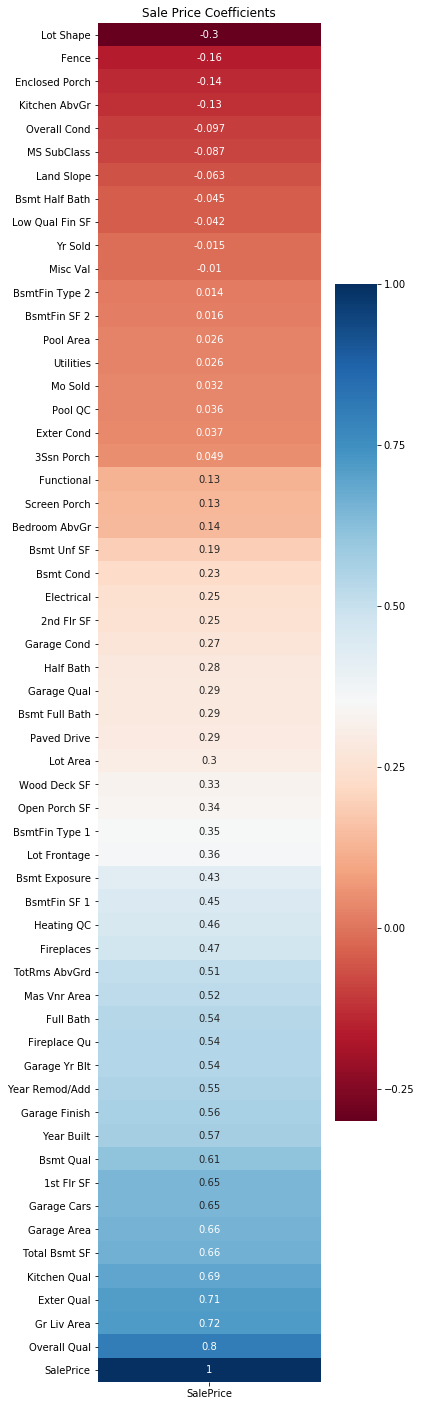

In [72]:
plt.figure(figsize=(5,25))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap = "RdBu");
plt.title('Sale Price Coefficients')

In [8]:
#check data types
df_train.dtypes.value_counts()

object     42
int64      26
float64    11
dtype: int64

In [9]:
#look for null values
df_train.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
Exterior 2nd         0
dtype: int64

# Preliminary EDA

<Figure size 432x288 with 0 Axes>

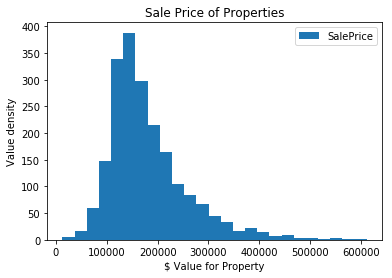

In [10]:
#look at distribution of training data 'SalePrice'
plt.figure()
df_train[['SalePrice']].plot(kind= 'hist',bins=25,title = 'Sale Price of Properties')

plt.xlabel('$ Value for Property')
plt.ylabel('Value density');

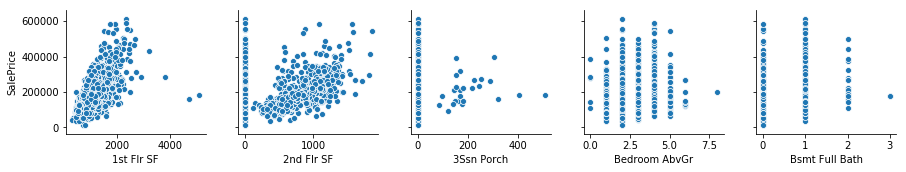

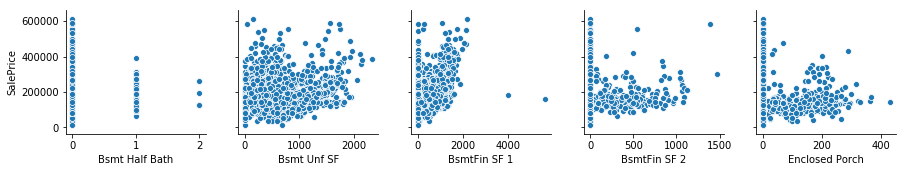

In [11]:
# sns.pairplot(df_train)
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(0, 5)]);
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(5, 10)]);


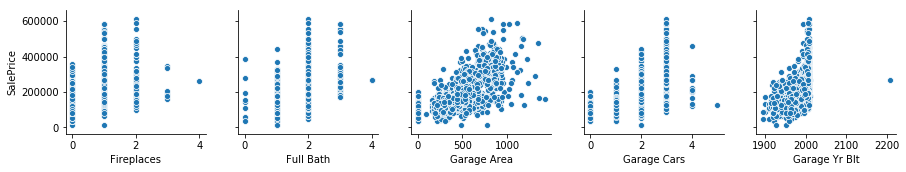

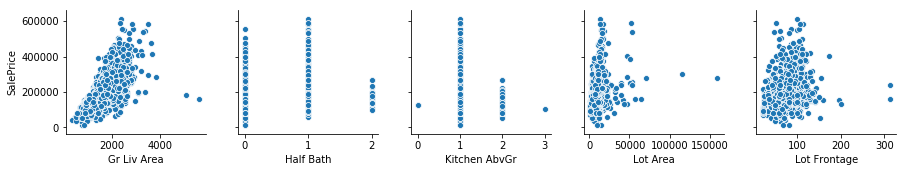

In [12]:
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(10, 15)]);
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(15, 20)]);

In [13]:
#remove outliers of 'Garage Yr Blt'
mask_garage = df_train['Garage Yr Blt'] >2100
df_train[mask_garage]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2261,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [14]:
#drop by index locations
df_train.drop(labels=[2261], inplace=True)

In [15]:
#remove outliers by 'Gr Liv Area' > 4000 ft
mask_4000 = df_train['Gr Liv Area']>4000
df_train[mask_4000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1499,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
2181,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [16]:
#drop by index locations
df_train.drop(labels=[1499, 2181], inplace=True)

In [17]:
#verify the rows dropped 
df_train[mask_4000]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


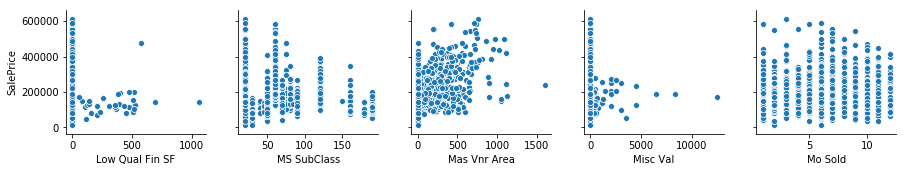

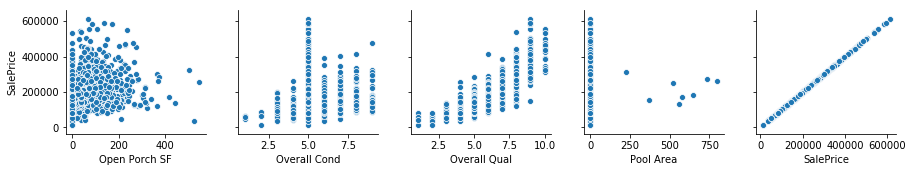

In [18]:
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(20, 25)]);
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(25, 30)]);

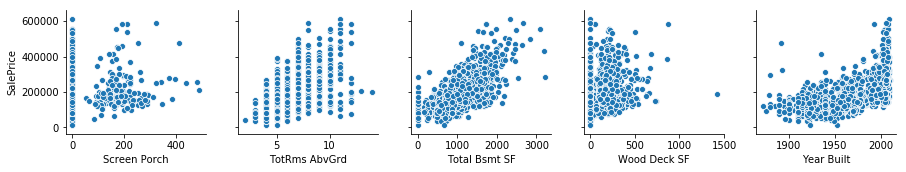

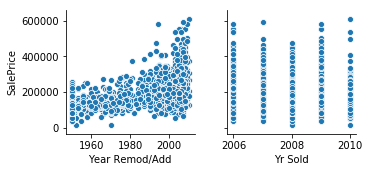

In [19]:
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(30, 35)]);
sns.pairplot(df_train, y_vars='SalePrice', x_vars=df_train._get_numeric_data().columns.sort_values()[range(35, 37)]);

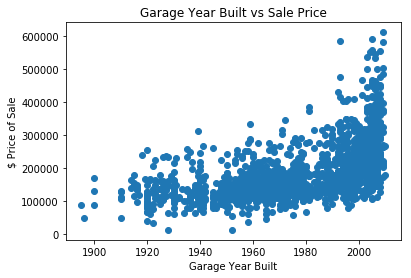

In [20]:
#visually verify the new scatterplots with dropped outliers
plt.scatter(df_train['Garage Yr Blt'], df_train['SalePrice'])
plt.title('Garage Year Built vs Sale Price')
plt.xlabel('Garage Year Built')
plt.ylabel('$ Price of Sale');

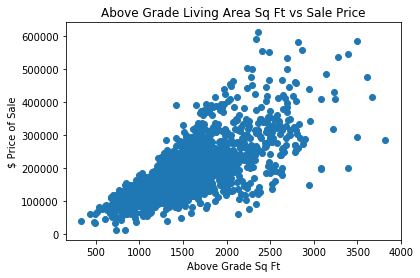

In [21]:
#visually verify the new scatterplots with dropped outliers
plt.scatter(df_train['Gr Liv Area'], df_train['SalePrice'])
plt.title('Above Grade Living Area Sq Ft vs Sale Price')
plt.xlabel('Above Grade Sq Ft')
plt.ylabel('$ Price of Sale');

Based on the information and relationships that were studied in the EDA, I think we have a good chance of being able to uncover significant linear relationships between features and the target of Sale Price.

# Feature Engineering

In [22]:
#list of ordinal variables to turn into a corresponding ranking system 
ordinal_vars = ['Lot Shape','Utilities','Land Slope','Exter Qual','Exter Cond',
              'Bsmt Cond','Bsmt Qual','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
              'Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu',
               'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

In [23]:
#convert ordinal variables into numerical rank
#code assisted by noah
#creating a ranking dictionary for the ordinal categorical variables
rank_dict = {'Lot Shape': {'IR1': 1, 'Reg': 4, 'IR2': 2, 'IR3': 3},
             'Utilities': {'AllPub':4, 'NoSeWa':2, 'NoSewr':3, 'ELO':1},
             'Land Slope': {'Gtl':3, 'Sev':2, 'Mod':1},
             'Exter Qual': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1},
             'Exter Cond': {'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1},
             'Bsmt Cond': {'TA':3, 'Gd':4, np.nan:0, 'Fa':2, 'Po':1, 'Ex':5},
             'Bsmt Qual': {'TA':3, 'Gd':4, 'Fa':2, np.nan:0, 'Ex':5, 'Po':1},
             'Bsmt Exposure': {'No':1, 'Gd':4, 'Av':3, np.nan:0, 'Mn':2},
             'BsmtFin Type 1': {'GLQ':6, 'Unf':1, 'ALQ':5, 'Rec':3, np.nan:0, 'BLQ':4, 'LwQ':2},
             'BsmtFin Type 2': {'Unf':1, 'Rec':3, np.nan:0, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'ALQ':5},
             'Heating QC': {'Ex':5, 'TA':3, 'Gd':4, 'Fa':2, 'Po':1},
             'Electrical': {'SBrkr':5, 'FuseF':3, 'FuseA':4, 'FuseP':2, 'Mix':1, np.nan:0},
             'Kitchen Qual': {'Gd':4, 'TA':3, 'Fa':2, 'Ex':5,'Po':1},
             'Functional': {'Typ':8, 'Mod':5, 'Min2':6, 'Maj1':4, 'Min1':7, 'Sev':2, 'Sal':1, 'Maj2':3},
             'Fireplace Qu': {np.nan:0, 'TA':3, 'Gd':4, 'Po':1, 'Ex':5, 'Fa':2},
             'Garage Finish': {'RFn':2, 'Unf':1, 'Fin':3, np.nan:0},
             'Garage Qual': {'TA':3, 'Fa':2, np.nan:0, 'Gd':4, 'Ex':5, 'Po':1},
             'Garage Cond': {'TA':3, 'Fa':2, np.nan:0, 'Po':1, 'Gd':4, 'Ex':5},
             'Paved Drive': {'Y':3, 'N':1, 'P':2},
             'Pool QC': {np.nan:0, 'Fa':1, 'Gd':3, 'Ex':4, 'TA':2},
             'Fence': {np.nan:0, 'MnPrv':3, 'GdPrv':4, 'GdWo':2, 'MnWw':1}
            }


#define a function to map the new values for ranking dictionary
def rank_ordinals(df):
    for col in ordinal_vars:
        df[col] = df[col].map(rank_dict[col])
    return df

rank_ordinals(df_train)
rank_ordinals(df_test)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,190,RM,69.0,9142,Pave,Grvl,4,Lvl,4,Inside,...,0,0,0,0,0,NaN,0,4,2006,WD
2718,90,RL,NaN,9662,Pave,NaN,1,Lvl,4,Inside,...,0,0,0,0,0,NaN,0,8,2006,WD
2414,60,RL,58.0,17104,Pave,NaN,1,Lvl,4,Inside,...,0,0,0,0,0,NaN,0,9,2006,New
1989,30,RM,60.0,8520,Pave,NaN,4,Lvl,4,Inside,...,0,0,0,0,0,NaN,0,7,2007,WD
625,20,RL,NaN,9500,Pave,NaN,1,Lvl,4,Inside,...,0,185,0,0,0,NaN,0,7,2009,WD
333,160,RM,21.0,1890,Pave,NaN,4,Lvl,4,Inside,...,0,0,0,0,0,NaN,0,6,2010,WD
1327,20,RM,52.0,8516,Pave,NaN,4,Lvl,4,Inside,...,0,0,0,0,0,NaN,0,5,2008,WD
858,20,RL,NaN,9286,Pave,NaN,1,Lvl,4,CulDSac,...,0,0,0,0,0,NaN,0,10,2009,WD
95,160,FV,39.0,3515,Pave,Pave,4,Lvl,4,Inside,...,0,0,0,0,0,NaN,0,1,2010,WD


In [24]:
#verify there are no more ordinal null values in training data
df_train[ordinal_vars].isnull().sum()

Lot Shape         0
Utilities         0
Land Slope        0
Exter Qual        0
Exter Cond        0
Bsmt Cond         0
Bsmt Qual         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
dtype: int64

In [25]:
#verify there are no more ordinal null values in testing data
df_test[ordinal_vars].isnull().sum()

Lot Shape         0
Utilities         0
Land Slope        0
Exter Qual        0
Exter Cond        0
Bsmt Cond         0
Bsmt Qual         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating QC        0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Fence             0
dtype: int64

In [26]:
#look for null values to eliminate
df_train.isnull().sum().sort_values(ascending=False).head(27)

Misc Feature      1984
Alley             1908
Lot Frontage       330
Garage Yr Blt      114
Garage Type        113
Mas Vnr Area        21
Mas Vnr Type        21
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Roof Style           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
Roof Matl            0
SalePrice            0
dtype: int64

In [27]:
#incorporate dummies to deal with null values 
#first, define the nominal variables that we are dummying
nominal_vars = ['Neighborhood', 'Heating', 'Sale Type', 'Bldg Type', 'Central Air',
                'Land Contour', 'Roof Matl', 'Garage Type', 'Roof Style', 'Alley', 'Lot Config',
                'Condition 2', 'Street', 'Exterior 2nd', 'Exterior 1st', 'Misc Feature',
                'Foundation', 'Condition 1', 'Mas Vnr Type', 'MS Zoning', 'House Style']

In [28]:
#making dummies for all categorical, nominal data

df_train_dummies = df_train.join(pd.get_dummies(df_train[nominal_vars]))

df_train_dummies = pd.get_dummies(df_train, columns = nominal_vars)

df_test_dummies = pd.get_dummies(df_test, columns = nominal_vars)


In [29]:
# identify missing columns 
list_test = list(set(df_test_dummies) - set(df_train_dummies))

# identify missing columns 
list_train = list(set(df_train_dummies) - set(df_test_dummies))

In [30]:
# drop from test
df_test_dummies = df_test_dummies.drop(columns= list_test, axis = 1)


In [31]:
#remove sale price from train list 
list_train.remove('SalePrice')

In [32]:
#drop the missing columns from train dummies
df_train_dummies= df_train_dummies.drop(columns = list_train, axis = 1)

In [33]:
df_train_dummies.shape

(2048, 198)

In [34]:
df_test_dummies.shape

(879, 197)

In [35]:
#look for null values to eliminate
df_train_dummies.isnull().sum().sort_values(ascending=False).head(27)

Lot Frontage            330
Garage Yr Blt           114
Mas Vnr Area             21
Bsmt Half Bath            2
Bsmt Full Bath            2
Total Bsmt SF             1
Bsmt Unf SF               1
BsmtFin SF 2              1
BsmtFin SF 1              1
Garage Area               1
Garage Cars               1
Neighborhood_CollgCr      0
Neighborhood_Crawfor      0
Yr Sold                   0
Neighborhood_NWAmes       0
Neighborhood_NPkVill      0
Neighborhood_NAmes        0
Neighborhood_Mitchel      0
Neighborhood_MeadowV      0
Neighborhood_IDOTRR       0
SalePrice                 0
Neighborhood_Blmngtn      0
Neighborhood_Blueste      0
Neighborhood_Greens       0
Neighborhood_BrDale       0
Neighborhood_BrkSide      0
Neighborhood_Gilbert      0
dtype: int64

In [36]:
#code originally written by Jen

num_cols = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 
            'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area' ]

def replace_nan (df, lst, fillval):
    for col in lst:
        df.loc[df[col].isnull(), col] = fillval
    return

In [37]:
#fill all null values in numerical columns with 0 for training dummies df
replace_nan(df_train_dummies, num_cols, 0)

In [38]:
#fill all null values in numerical columns with 0 for testing dummies df
replace_nan(df_test_dummies, num_cols, 0)

In [39]:
#look for null values to eliminate
df_train_dummies.isnull().sum().sort_values(ascending=False).head(27)

House Style_SLvl        0
Neighborhood_NWAmes     0
Neighborhood_NAmes      0
Neighborhood_Mitchel    0
Neighborhood_MeadowV    0
Neighborhood_IDOTRR     0
Neighborhood_Greens     0
Neighborhood_Gilbert    0
Neighborhood_Edwards    0
Neighborhood_Crawfor    0
Neighborhood_CollgCr    0
Neighborhood_ClearCr    0
Neighborhood_BrkSide    0
Neighborhood_BrDale     0
Neighborhood_Blueste    0
Neighborhood_Blmngtn    0
SalePrice               0
Yr Sold                 0
Mo Sold                 0
Misc Val                0
Fence                   0
Pool QC                 0
Pool Area               0
Neighborhood_NPkVill    0
Neighborhood_NoRidge    0
3Ssn Porch              0
Neighborhood_NridgHt    0
dtype: int64

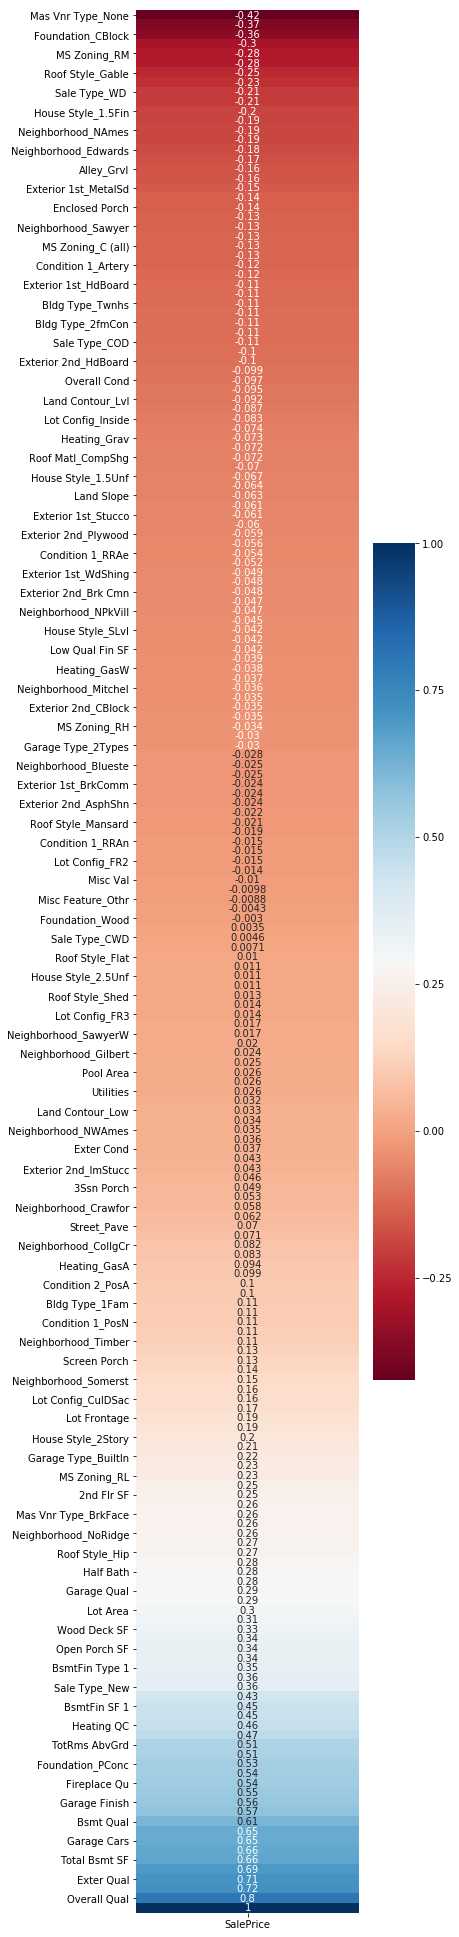

In [40]:
plt.figure(figsize=(5,35))
sns.heatmap(df_train_dummies.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap = "RdBu");

In [41]:
df_train_dummies.shape

(2048, 198)

In [42]:
df_test_dummies.shape

(879, 197)

# Model Prep


In [43]:
df_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 109 to 10
Columns: 198 entries, MS SubClass to House Style_SLvl
dtypes: float64(11), int64(47), uint8(140)
memory usage: 1.3 MB


In [44]:
df_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Columns: 197 entries, MS SubClass to House Style_SLvl
dtypes: float64(11), int64(46), uint8(140)
memory usage: 518.5 KB


In [45]:
#set features and target variable
X = df_train_dummies.select_dtypes(include=['float64', 'int64', 'uint8'] )
X.drop('SalePrice', axis = 1, inplace=True)

y= df_train_dummies['SalePrice']

In [46]:
#Train/Test split : Splits up our X and y into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Linear Regression
to be used as the baseline for our comparisons

In [47]:
#instantiate linear regression model
lr = LinearRegression()

#fit the model
model = lr.fit(X_train, y_train)

#generate predictions
y_hat_lr_train = model.predict(X_train)
y_hat_lr_test = model.predict(X_test)

#calculate the RMSE for both
print('RESULTS FOR LINEAR MODEL:')
print(f'The RMSE Score for Training Data: {np.sqrt(mean_squared_error(y_train, y_hat_lr_train))}')
print(f'The RMSE Score for Test Data: {np.sqrt(mean_squared_error(y_test, y_hat_lr_test))}')
print(f'The R^2 Score for Train Data: {model.score(X_train, y_train)}')
print(f'The R^2 Score for Test Data: {model.score(X_test, y_test)}')

RESULTS FOR LINEAR MODEL:
The RMSE Score for Training Data: 21187.071266066556
The RMSE Score for Test Data: 22782.221585917865
The R^2 Score for Train Data: 0.9295940366128587
The R^2 Score for Test Data: 0.9135306350359088


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Actual Price')

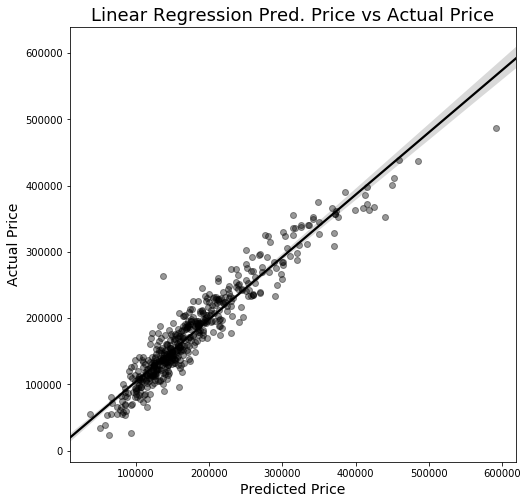

In [48]:
#code originally written by Noah
plt.figure(figsize = (8,8))
sns.regplot(y_test,y_hat_lr_test,scatter_kws={'alpha' : 0.4}, color = 'k')
plt.title('Linear Regression Pred. Price vs Actual Price', fontsize = 18)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Actual Price', fontsize = 14)

### Scaling our Data
Important for additional models

In [49]:
from sklearn.preprocessing import StandardScaler
#Scaling our data: used when applying Ridge and Lasso (also ElasticNet)
ss = StandardScaler()

#fit the standard scaler to our training data
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Linear Model (Scaled)

In [50]:
#instantiate linear regression model
lr = LinearRegression()

#fit the model
model = lr.fit(X_train_scaled, y_train)

#generate predictions
y_hat_lr_train_scaled = model.predict(X_train_scaled)
y_hat_lr_test_scaled = model.predict(X_test_scaled)

#calculate the RMSE and R^2 scores for both
print('RESULTS FOR LINEAR MODEL (SCALED):')
print(f'The RMSE Score for Training Data: {np.sqrt(mean_squared_error(y_train, y_hat_lr_train_scaled))}')
print(f'The RMSE Score for Test Data: {np.sqrt(mean_squared_error(y_test, y_hat_lr_test_scaled))}')
print(f'The R^2 Score for Train Data: {model.score(X_train_scaled, y_train)}')
print(f'The R^2 Score for Test Data: {model.score(X_test_scaled, y_test)}')

RESULTS FOR LINEAR MODEL (SCALED):
The RMSE Score for Training Data: 21187.058451502166
The RMSE Score for Test Data: 22782.793392456
The R^2 Score for Train Data: 0.9295941217800312
The R^2 Score for Test Data: 0.9135262944259697


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Actual Price')

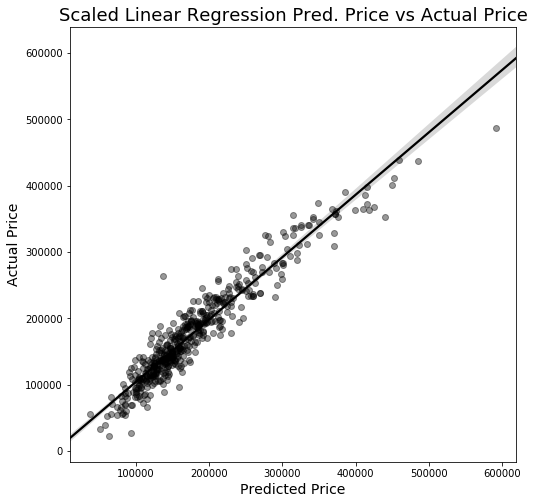

In [51]:
#code originally written by Noah
plt.figure(figsize = (8,8))
sns.regplot(y_test,y_hat_lr_test_scaled,scatter_kws={'alpha' : 0.4}, color = 'k')
plt.title('Scaled Linear Regression Pred. Price vs Actual Price', fontsize = 18)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Actual Price', fontsize = 14)

# Lasso regularization method

In [52]:
#Instantiate our models
lasso = LassoCV(n_alphas = 200)

In [53]:
X_train_scaled.shape

(1536, 197)

In [54]:
X_test_scaled.shape

(512, 197)

In [55]:
#determine optimal alpha for lasso
lasso.fit(X_train_scaled, y_train)
optimal_alpha = lasso.alpha_
print(f'The optimal lasso alpha is: {lasso.alpha_}')

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


The optimal lasso alpha is: 529.6986584120648


In [56]:
#import cross val scores
from sklearn.model_selection import cross_val_score

In [57]:
lasso = Lasso(alpha = optimal_alpha)
lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5)
print(lasso_scores)
print(f'The mean of the lasso scores is: {np.mean(lasso_scores)}')

[0.90712209 0.91589777 0.86377207 0.91613597 0.91608608]
The mean of the lasso scores is: 0.9038027940796136


In [58]:
#Predictions for lasso
lasso.fit(X_train_scaled, y_train)
y_hat_lasso_train_scaled = lasso.predict(X_train_scaled)
y_hat_lasso_test_scaled = lasso.predict(X_test_scaled)

In [59]:
#calculate the RMSE and R^2 scores for both
print('RESULTS FOR LASSO:')
print(f'The RMSE Score for Training Data: {np.sqrt(mean_squared_error(y_train, y_hat_lasso_train_scaled))}')
print(f'The RMSE Score for Test Data: {np.sqrt(mean_squared_error(y_test, y_hat_lasso_test_scaled))}')
print(f'The R^2 Score for Train Data: {lasso.score(X_train_scaled, y_train)}')
print(f'The R^2 Score for Test Data: {lasso.score(X_test_scaled, y_test)}')

RESULTS FOR LASSO:
The RMSE Score for Training Data: 22430.68503843556
The RMSE Score for Test Data: 22226.41357888047
The R^2 Score for Train Data: 0.9210862530033597
The R^2 Score for Test Data: 0.9176982805183043


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Actual Price')

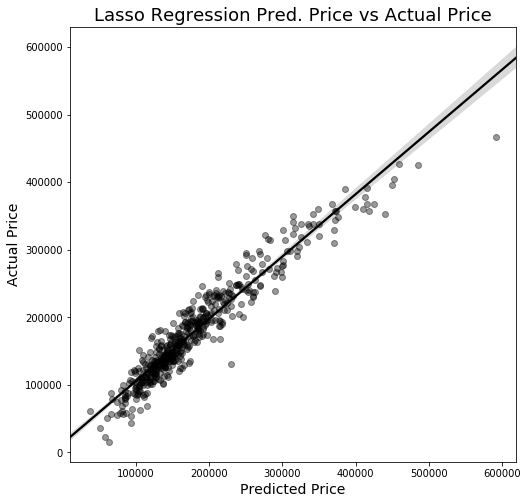

In [60]:
plt.figure(figsize = (8,8))
sns.regplot(y_test,y_hat_lasso_test_scaled,scatter_kws={'alpha' : 0.4}, color = 'k')
plt.title('Lasso Regression Pred. Price vs Actual Price', fontsize = 18)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Actual Price', fontsize = 14)

### Ridge regularization method

In [61]:
#optimize alphas for ridge
r_alphas= np.logspace(0,10,100)

In [62]:
#instantiate ridge 
optimal_ridge = RidgeCV(alphas= r_alphas, cv=5)

#fit ridge to scaled data
optimal_ridge.fit(X_train_scaled, y_train)
ridge= Ridge(alpha=optimal_ridge.alpha_)

#get scores
ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5)
print(f'Ridge scores: {ridge_scores}')
print(f' Mean of Ridge scores: {ridge_scores.mean()}')

Ridge scores: [0.90288013 0.91763227 0.85658461 0.91683069 0.91502881]
 Mean of Ridge scores: 0.9017913004596302


In [63]:
#model the data using ridge
ridge_model = ridge.fit(X_train_scaled, y_train)
y_hat_ridge_train_scaled = ridge_model.predict(X_train_scaled)
y_hat_ridge_test_scaled = ridge_model.predict(X_test_scaled)

#calculate the RMSE and R^2 scores for both
print('RESULTS FOR RIDGE:')
print(f'The RMSE Score for Training Data: {np.sqrt(mean_squared_error(y_train, y_hat_ridge_train_scaled))}')
print(f'The RMSE Score for Test Data: {np.sqrt(mean_squared_error(y_test, y_hat_ridge_test_scaled))}')
print(f'The R^2 Score for Train Data: {ridge_model.score(X_train_scaled, y_train)}')
print(f'The R^2 Score for Test Data: {ridge_model.score(X_test_scaled, y_test)}')

RESULTS FOR RIDGE:
The RMSE Score for Training Data: 22152.297722568004
The RMSE Score for Test Data: 22291.803650337304
The R^2 Score for Train Data: 0.9230328952990576
The R^2 Score for Test Data: 0.9172133051265238


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Actual Price')

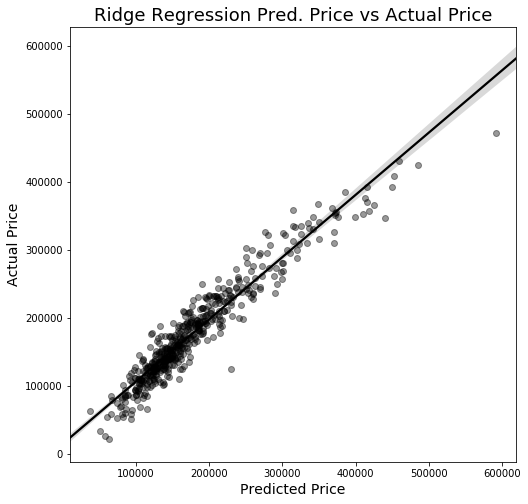

In [64]:
#graphing the predictions vs actual sale prices using Ridge
plt.figure(figsize = (8,8))
sns.regplot(y_test,y_hat_ridge_test_scaled,scatter_kws={'alpha' : 0.4}, color = 'k')
plt.title('Ridge Regression Pred. Price vs Actual Price', fontsize = 18)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Actual Price', fontsize = 14)

## Model Evaluation
* Evaluate the training and test scores

In [65]:

#calculate the RMSE and R^2 scores for both
print('RESULTS FOR LINEAR MODEL (SCALED):')
print(f'The RMSE Score for Training Data: {np.sqrt(mean_squared_error(y_train, y_hat_lr_train_scaled))}')
print(f'The RMSE Score for Test Data: {np.sqrt(mean_squared_error(y_test, y_hat_lr_test_scaled))}')
print(f'The R^2 Score for Train Data: {model.score(X_train_scaled, y_train)}')
print(f'The R^2 Score for Test Data: {model.score(X_test_scaled, y_test)}')

#calculate the RMSE and R^2 scores for both
print('RESULTS FOR LASSO:')
print(f'The RMSE Score for Training Data: {np.sqrt(mean_squared_error(y_train, y_hat_lasso_train_scaled))}')
print(f'The RMSE Score for Test Data: {np.sqrt(mean_squared_error(y_test, y_hat_lasso_test_scaled))}')
print(f'The R^2 Score for Train Data: {lasso.score(X_train_scaled, y_train)}')
print(f'The R^2 Score for Test Data: {lasso.score(X_test_scaled, y_test)}')

#calculate the RMSE and R^2 scores for both
print('RESULTS FOR RIDGE:')
print(f'The RMSE Score for Training Data: {np.sqrt(mean_squared_error(y_train, y_hat_ridge_train_scaled))}')
print(f'The RMSE Score for Test Data: {np.sqrt(mean_squared_error(y_test, y_hat_ridge_test_scaled))}')
print(f'The R^2 Score for Train Data: {ridge_model.score(X_train_scaled, y_train)}')
print(f'The R^2 Score for Test Data: {ridge_model.score(X_test_scaled, y_test)}')

RESULTS FOR LINEAR MODEL (SCALED):
The RMSE Score for Training Data: 21187.058451502166
The RMSE Score for Test Data: 22782.793392456
The R^2 Score for Train Data: 0.9295941217800312
The R^2 Score for Test Data: 0.9135262944259697
RESULTS FOR LASSO:
The RMSE Score for Training Data: 22430.68503843556
The RMSE Score for Test Data: 22226.41357888047
The R^2 Score for Train Data: 0.9210862530033597
The R^2 Score for Test Data: 0.9176982805183043
RESULTS FOR RIDGE:
The RMSE Score for Training Data: 22152.297722568004
The RMSE Score for Test Data: 22291.803650337304
The R^2 Score for Train Data: 0.9230328952990576
The R^2 Score for Test Data: 0.9172133051265238


## Model Interpretation

Although our models were fairly close in their results, the differences between the train and test splits paint a clear picture as to which model was superior. Given the baseline scores for Linear Model Scaled, Lasso and Ridge, it is apparent that our Lasso model has done the best. This is demonstrated by the difference between the RMSE as well as R^2 scores for train and test data, exhibiting the lowest bias and lowest variance. Additionally, the fact that the training RMSE is higher than the testing RMSE demonstrates that the model is in fact underfit, meaning that it should be able to generalize well to unseen datasets. Further, we can say that the score of 0.9176982805183043 means that our model can account for 91.76982805183043% of the variance of y, or SalePrice, compared to a model with no predictors. This is much better than our baseline, unscaled Linear Regression model.

Additionally, our model is limited in the time period of the data collected, which may be impacted by the global financial crisis of 2007-08, as the real estate market was directly impacted by the repercussions of the market dynamics.

#### Coefficients for Lasso

In [67]:
#exploring the coefficients for our lasso model
#code originally written by phil
df_lasso_coefs = pd.DataFrame(lasso.coef_)
df_lasso_coefs['name'] = X.columns
df_lasso_coefs['abs_coef'] = abs(df_lasso_coefs[0])
df_lasso_coefs.sort_values(by = 'abs_coef', ascending = False).head(35)

,0,name,abs_coef
27,24994.906280,Gr Liv Area,24994.906280
6,12319.606939,Overall Qual,12319.606939
17,9491.757140,BsmtFin SF 1,9491.757140
21,7125.204502,Total Bsmt SF,7125.204502
80,6356.203961,Neighborhood_StoneBr,6356.203961
74,6174.744304,Neighborhood_NridgHt,6174.744304
11,5999.475030,Exter Qual,5999.475030
10,5332.114172,Mas Vnr Area,5332.114172
8,5221.765609,Year Built,5221.765609
92,4670.304759,Sale Type_New,4670.304759


In [68]:
#highest magnitude for negatives
df_lasso_coefs.sort_values(by = 0, ascending = True).head(15)

,0,name,abs_coef
32,-2464.791970,Bedroom AbvGr,2464.791970
180,-2402.826836,Mas Vnr Type_BrkFace,2402.826836
0,-2017.546724,MS SubClass,2017.546724
120,-1783.054348,Roof Style_Mansard,1783.054348
179,-1430.390407,Mas Vnr Type_BrkCmn,1430.390407
33,-1097.450203,Kitchen AbvGr,1097.450203
86,-1094.756199,Sale Type_COD,1094.756199
75,-996.441030,Neighborhood_OldTown,996.441030
99,-856.202106,Bldg Type_TwnhsE,856.202106
170,-829.673055,Condition 1_Artery,829.673055


In [69]:
df_test_dummies.shape

(879, 197)

### Conclusions & Recommendations

After obtaining, cleaning, visualizing and modeling the data, it is now apparent for our audience as to the major drivers of real estate pricing for SalePrice of homes. Although this is taken from data in Ames, IA, the fact that our model is underfit lends credence to its ability to generalize well to other data. 

In looking at the coefficients that have the highest magnitude, we can provide some recommendations for better understanding the potential values of your real estate or to predict the price of a house. First, the Exterior Quality and Masonry Veneer Area are both areas in which there is a strong positive coefficient, meaning that efforts to improve them should positively impact the Sale Price. On the other hand, the negative coefficients of  both veneer styles of brick (face and common) and the Roof Style of "Mansard" should steer any investor or owner away from investing. 

Next steps that I recommend to take include obtaining additional data sets to feed into our models, so as to better understand the model's generalizability. Additionally, there are other regularization tools that could be employed, such as the ElasticNet regression, as well as also statistical methods that were not approached in this model. Including polynomial features by multiplying the predictive power of each of our 197 rows would also potentially yield more insights as to how the price of homes can be predicted.